# PLANT DISEASE DECTECTION 

##### problem statement...

Plant diseases have always been a challenge to plant growth and crop production in several parts of the world. Plant diseases can affect plants by interfering with several processes such as the absorbance and translocation of water and nutrients, photosynthesis, flower and fruit development, plant growth and development and cell division and enlargement. Plant diseases can be caused by different types of fungi, bacteria, phytoplasma, viruses, viroids, nematodes and other agents. The severity of diseases caused by these pathogens varies from mild symptoms to decline of the infected plants, depending on the aggressiveness of the pathogen, host resistance, environmental conditions, duration of infection and other factors.[1] Plant disease symptoms vary with the infecting pathogen and the infected part and can include leaf spots, leaf blights, root rots, fruit rots, fruit spots, wilt, dieback and decline.

impact of plant disease by Abdullah M Al-Sadi
Department of Crop Sciences, College of Agricultural and Marine Sciences, Sultan Qaboos University, Al-Khod, Oman

Date of Web Publication	27-Apr-2017
link: https://www.ijnpnd.com/article.asp?issn=2231-0738;year=2017;volume=7;issue=2;spage=21;epage=22;aulast=Al-Sadi

##### Plant disease: a threat to global food security by
Richard N Strange 1, Peter R Scott

A vast number of plant pathogens from viroids of a few hundred nucleotides to higher plants cause diseases in our crops. Their effects range from mild symptoms to catastrophes in which large areas planted to food crops are destroyed. Catastrophic plant disease exacerbates the current deficit of food supply in which at least 800 million people are inadequately fed. Plant pathogens are difficult to control because their populations are variable in time, space, and genotype. Most insidiously, they evolve, often overcoming the resistance that may have been the hard-won achievement of the plant breeder. In order to combat the losses they cause, it is necessary to define the problem and seek remedies. At the biological level, the requirements are for the speedy and accurate identification of the causal organism, accurate estimates of the severity of disease and its effect on yield, and identification of its virulence mechanisms. Disease may then be minimized by the reduction of the pathogen's inoculum, inhibition of its virulence mechanisms, and promotion of genetic diversity in the crop. Conventional plant breeding for resistance has an important role to play that can now be facilitated by marker-assisted selection. There is also a role for transgenic modification with genes that confer resistance. At the political level, there is a need to acknowledge that plant diseases threaten our food supplies and to devote adequate resources to their control.


link:https://pubmed.ncbi.nlm.nih.gov/16078878/

*I worked on this project so we can build an app that works on our smartphone which can quickly detect the type of disease affecting our farm produce,  this will reduce the amount of farm produce that will be lost to farm diseases*.
*it will help us to control disease infection in farm at early stage*.
*It will also improve the farm yield sice we are detecting the disease at its early stage*. 

### Step to solve the problem:

1. ##### importing the image on our notebook.
2. ##### extracting the images in jupyter notebook.
3. ##### visualizing the image that we will be working on. 
4. ##### converting the image into a numpyarray and normalizing them
5. ##### checking class imbalance
6. ##### splitting the data and performing one-hot encoding.
7. ##### creating modl architecture, compliling the model and then fitting it.
8. ##### plotting the accuracy and loss against each epoch
9. ##### preprocessing the test data and making prediction on it.
10. ##### visualizing the original and predictd labels for the test images.


* building a streamlit App for the plant disease detection



In this project we will create a convolution Neural Network which will be able to predict whether a plant is suffering from a disease. we will use different layers and other hyperparameters for building , training, and testing this classification model. we will be using TensorFlow and Keras for this project.

#### importing all the libraries ......

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir

from sklearn.preprocessing import label_binarize,LabelBinarizer
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation,Flatten,Dropout,Dense
from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image

plotting 16 images from the potato__Early_blight dataset

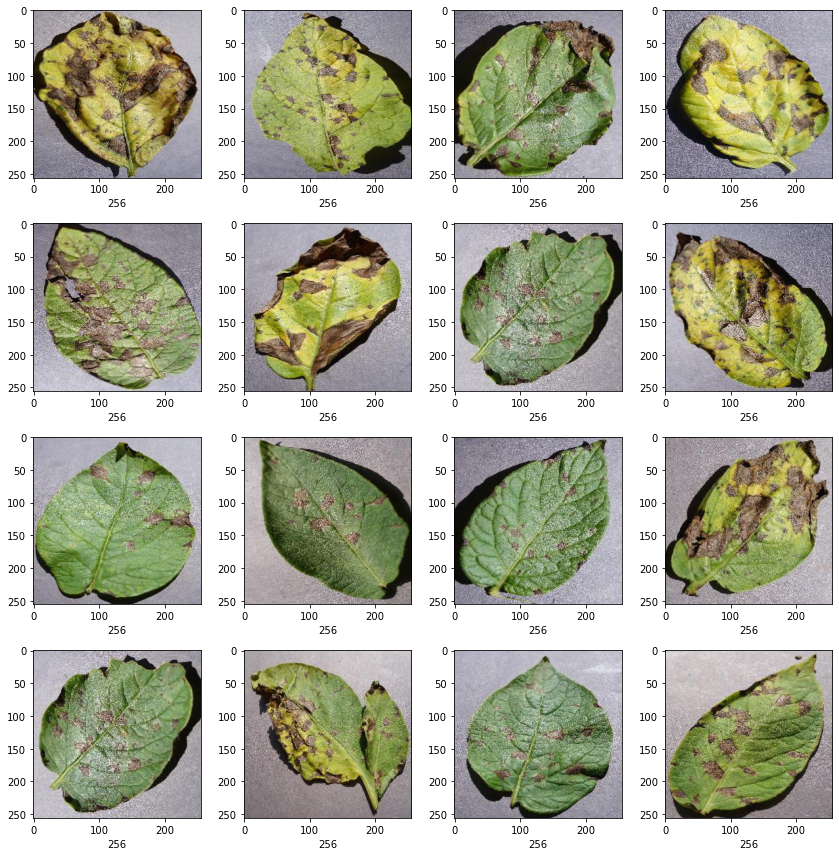

In [2]:

plt.figure(figsize=(12,12))
path = 'Plant_images/Potato___Early_blight'
for items in range(1,17):
    plt.subplot(4,4,items)
    plt.tight_layout()
    # sorting the image according to thier names and the randomly choosing the sorted image, the concatenating the image name with the image path and the storing it in a variable
    t_path = path + '/' + random.choice(sorted(os.listdir(path)))
    rand_img = imread(t_path)
    # displaying the image, rand_img is a numpy data 
    plt.imshow(rand_img)
    # 
    plt.xlabel(rand_img.shape[1],fontsize=10) # WIDTH OF THE IMAGE
    plt.xlabel(rand_img.shape[0],fontsize=10) # HEIGHT OF THE IMAGE

###### making a function that will convert all our images into numpy array and also resize them all into 256 by 256

In [3]:
def convert_image_to_numpy_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image,(256,256))
            #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            return(img_to_array(image))
        else:
            return np.array([])
    except Exception as err:
        print(f'Error: {err}')
        return None
    

the above is necessary becuse we will need to normalize our images 

First let me tell you something brief about the gray image and RGB image.

A Gray image is a combination of all three planes(R,G,B) in a ratio stated as below. Thereby, you'll get a “2-D” image i.e; two spatial coordinates only.

On the other hand, an RGB image consists of third dimension in addition to the 2 dimensions in gray image, which differs the RGB image and gray image.

RGB consists of 3rd component called intensity component along with 2 spatial coordinates.

We combine 3 components into 1 while converting RGB image into gray image i.e;

Gray image = 0.29 * R(component)+ 0.59 * G(component)+ 0.11 * B(component)

The vice versa is not possible. I'll give an example to it, take the raw colours R,G,B and mix them for obtaining a new color, can we get back the R,G,B components back from the obtained color? No, the same way is with gray image too. Hence, we can't get the RGB image from a Gray image.

Thank you….

### --------------------------------

RGB image contains lots of data which may not be required for your processing. When you convert a RGB image into Gray scale you discard lots of information which are not required for processing.

Incase of a RGB scale image, for each of the component, i.e. R,G,B, image holds different intensity labels. RGB image is represented by 3 channels. each of the channel generally consists of 8-bits. Therefore, for a color image you will have intensities for each scale. Hence, lots of data to store and or manipulate.

Now, you may ask if we discard lots of data then several information will get lost.

Now, consider a situation, you have an image where only a filled RED color ball is present. Now you are asked to count the number of components available in that image. The answer will be 1. But the question is, do you actually need all the color level information to get the component count ?

The answer is NO. Because if you convert the image into a Gray scale image, then though you will loose all the information related to color, yet the BALL will be represented by the Gray scale tone with only a single channel (which will still remain a single component). Thus, reducing a lot of information which are not required and also you will save lot of computational power as well.

Only a single channel image is enough to get the component count.

##### getting the list of directories of the plant_images directories

In [4]:
dirr = 'Plant_images/Plant_images'
root_dir = listdir(dirr)

In [5]:
root_dir

['Corn_(maize)___Common_rust_',
 'Potato___Early_blight',
 'Tomato___Bacterial_spot']

##### reading and converting the image to numpy array

In [6]:
image_list, label_list = [],[]
all_labels = ['Corn-Common_rust','Potato-Early_blight','Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# reading and converting the image to numpy array
for directory in root_dir:
    plant_image_list = listdir(f'{dirr}/{directory}')
    print(plant_image_list[:2])
    temp+=1
    for files in plant_image_list:
        file_path = f'{dirr}/{directory}/{files}'
        image_list.append(convert_image_to_numpy_array(file_path))
        label_list.append(binary_labels[temp])


['RS_Rust 2469.JPG', 'RS_Rust 2470.JPG']
['b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG', 'b6220993-c51f-48fa-bee9-fb5cb89cc0c4___RS_Early.B 7467.JPG']
['dfce64d1-9954-4922-8beb-2681e2e6b896___GCREC_Bact.Sp 2961.JPG', 'dfdf92be-f19c-4833-a744-0ba25b3bb8bd___GCREC_Bact.Sp 3793.JPG']


In [7]:
print('total images is  {}'.format(len(label_list)))

total images is  900


#### checking  class imbalance...

we need to know if the classes of the plant is balance, will do this by visualizing it with pandas dataframe

In [8]:
class_balance = pd.DataFrame(label_list)

In [9]:
class_balance.value_counts()

0    300
1    300
2    300
dtype: int64

so we can see that our dataset is balance

In [10]:
image_list[0].shape

(256, 256, 3)

#### we need to split our data into training and testing data set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(image_list,label_list, test_size=0.2, random_state=10)

### norrmalizing our images to better computation...

In [12]:
X_train = np.array(X_train,dtype = np.float16)/255
X_test = np.array(X_test,dtype = np.float16)/255

In [13]:
X_train[0][0][0]

array([0.5137, 0.51  , 0.5254], dtype=float16)

<!-- ##### reshaping the training and testing set [batch_size,height,width,color_channel] -->

<!-- we  will set the batch size to be -1, this will make the traning and testing data a 4D data and also a dynamic batch size. -->

In [14]:
# X_train = X_train.reshape(-1,256,256,3)
# X_test = X_test.reshape(-1,256,256,3)

One-Hot Encoding the labels.

this this done to categorise the dataset 

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

We did one-hot encoding so that the neural network  won''t priotize it.

### Creating Network Architecture 

we will create network architecture for the model.
we will use different types of layers according to their features namely Conv_2d(it is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor),
max_pooling_2d(it is a downsampling technique which takes out the maximum value obver the window defined by poolsize),
flatten(it flattens the imput and creates a 1D output),
Dense(dense layer produce the output as the product of the input kernel)

##### steps in creating architecture

1. Convolution Operation( using feature detectors, which basically serve as a neural network filters)

2. ReLU layer(Rectified linear Unit), how linearity function,ReLU is used purposely to aviod linearity

3. pooling: using max orsum pooling and so on, to get extract out the important pixel of the image
    
4. flattening:  turning the image to ID 

In [17]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',input_shape = (256,256,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(32,(3,3),padding='same',input_shape = (256,256,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                401424    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

##### we will compile the model..

when compiling models , i need to chooe a loss function and an optimizer.
the loss function is the quantity that will be minimized during training.
the optimizer determines determines how the network will be updated based on the loss function.

In [18]:
model.compile(loss='categorical_crossentropy',optimizer= Adam(), metrics=['accuracy'])

##### splitting the training dataset into taining set and validation sets 

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2)

##### we will use callbacks
here will will implement using early stopping with patience of 10 and i will give the model a name of 'plant_disease_detector_model'

In [20]:
from tensorflow.keras import callbacks 


In [21]:
check_point = callbacks.ModelCheckpoint('plant_disease_detector_model',save_best_only=True)
earlystopping = callbacks.EarlyStopping(patience=10,restore_best_weights=True)

 ##### next we fit the model

In [22]:
epochs = 50
batch_size = 128
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                   validation_data=(X_val,y_val),
                  callbacks=[check_point,earlystopping])

Epoch 1/50
18/18 [==============================] - 36s 2s/step - loss: 0.8089 - accuracy: 0.5920 - val_loss: 0.4721 - val_accuracy: 0.7014
INFO:tensorflow:Assets written to: plant_disease_detector_model\assets
Epoch 2/50
18/18 [==============================] - 25s 1s/step - loss: 0.3682 - accuracy: 0.8490 - val_loss: 0.1998 - val_accuracy: 0.9375
INFO:tensorflow:Assets written to: plant_disease_detector_model\assets
Epoch 3/50
18/18 [==============================] - 25s 1s/step - loss: 0.1557 - accuracy: 0.9635 - val_loss: 0.1199 - val_accuracy: 0.9583
INFO:tensorflow:Assets written to: plant_disease_detector_model\assets
Epoch 4/50
18/18 [==============================] - 25s 1s/step - loss: 0.1090 - accuracy: 0.9618 - val_loss: 0.1192 - val_accuracy: 0.9306
INFO:tensorflow:Assets written to: plant_disease_detector_model\assets
Epoch 5/50
18/18 [==============================] - 25s 1s/step - loss: 0.1221 - accuracy: 0.9549 - val_loss: 0.1895 - val_accuracy: 0.9306
Epoch 6/50
18/18

In [24]:
model_history = pd.DataFrame(history.history)

### i will be saving my model as a json file

In [25]:
model.save(os.getcwd()+'\\'+'plant_disease_detect.h5')

In [26]:
json_model = model.to_json()

In [27]:
# json_model

we save the json model into a file called 'plant_disease.json' and we also save the weights into a file called plant_disease_weights.h5 

In [28]:
with open(os.getcwd()+'\\'+'plant_disease_detect.json','w') as json_file:
    json_file.write(json_model)
model.save_weights(os.getcwd()+'\\'+'plant_disease_detect_weights.h5')

 #### plotting the training history of the model

Text(0, 0.5, 'accuracy/loss')

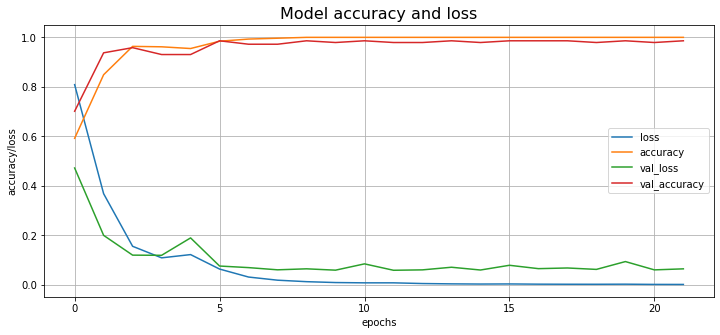

In [29]:
model_history.plot(figsize=(12,5))
plt.grid(True)
plt.title('Model accuracy and loss',fontsize=16,)
plt.xlabel('epochs')
plt.ylabel('accuracy/loss')

#### evaluating model on test set

In [30]:
scores = model.evaluate(X_test,y_test)

6/6 [==============================] - 1s 211ms/step - loss: 0.0157 - accuracy: 0.9944


In [31]:
print(f'Test Accuracy:{round(scores[1] * 100,3)}%')

Test Accuracy:99.444%


##### we will predict an image from the text data

In [32]:
pred = model.predict(X_test)

In [33]:
# prediction of the test data
pd.DataFrame(pred,columns=all_labels)

,Corn-Common_rust,Potato-Early_blight,Tomato-Bacterial_spot
0,5.368782e-06,9.997379e-01,2.567114e-04
1,1.000000e+00,7.308592e-10,8.854948e-16
2,2.211830e-08,1.935737e-02,9.806426e-01
3,9.936538e-01,6.338863e-03,7.402987e-06
4,9.999999e-01,1.756547e-07,1.500740e-11
...,...,...,...
175,9.998378e-01,1.621906e-04,1.258705e-08
176,1.646730e-07,1.222313e-01,8.777686e-01
177,9.999948e-01,5.267931e-06,2.580881e-10
178,3.966697e-11,1.467354e-04,9.998533e-01


visualing an image in the test set

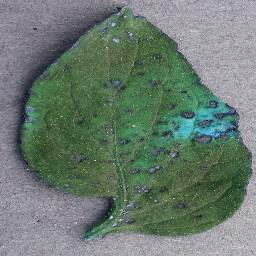

In [34]:
img = array_to_img(X_test[5])
img

##### finding max value from prediction list and comparing original value vs predicted 

In [35]:
all_labels[np.argmax(y_test[10])]

'Potato-Early_blight'

In [36]:
y_test[10]

array([0., 1., 0.], dtype=float32)

In [37]:
print('original plant: ',all_labels[np.argmax(y_test[10])])
print('predicted plant: ',all_labels[np.argmax(pred[10])])

original plant:  Potato-Early_blight
predicted plant:  Potato-Early_blight


### Conclusion


we started with loading the dataset into jupyter notebook and then visualizing the images.Normalizing is an important step when working with any type of dataset. After that we created a CNN model which is futher used for predicting the plant disease using the image supplied to model. This model is highly bebeficial as it can be used by agricultural firms and farmers to increase their yield and stop wastage of crops due to disease

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model()